In [95]:
# imports
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, model_selection, svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
%matplotlib inline


LOADING THE DATA

In [96]:

df = pd.read_csv('Sales.csv')

df.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


INFORMATION ABOUT THE DATA

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [98]:
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


CHECKING IF THERE ARE ANY MISSING VALUES

In [99]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

CHECKING FOR DISTRIBUTION OF ITEM_WEIGHT VARIABLES IN THE DATASET

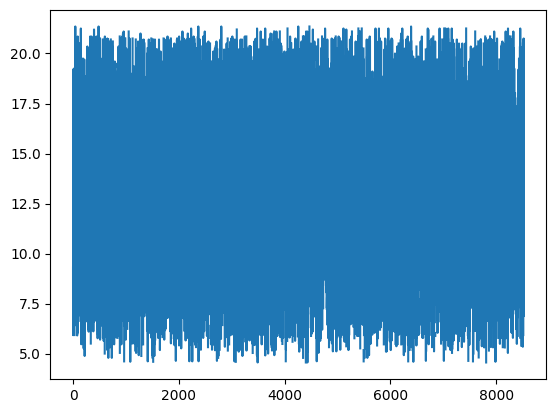

In [100]:
df["Item_Weight"].plot()

plt.show()


REPLACING ALL THE NULL VALUES WITH THE MEAN

In [101]:

df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df['Item_Visibility'] = df['Item_Visibility'].replace(0.000000,df['Item_Visibility'].mean())
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot: xlabel='Outlet_Size'>

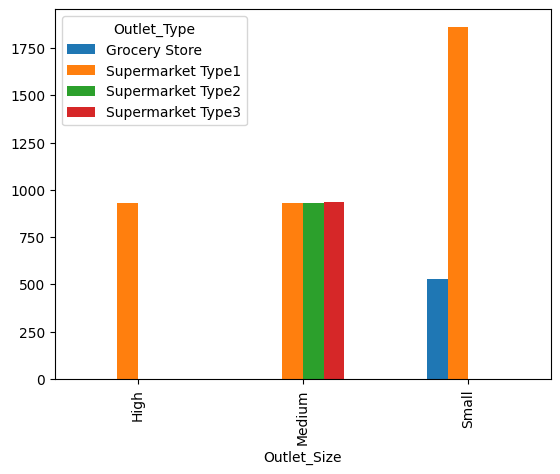

In [102]:

ef=df.groupby(['Outlet_Size','Outlet_Type']).size()
ef=ef.unstack()
ef.plot(kind='bar')


In [103]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


MODE OF OUTLET SIZE


In [104]:

d={}
d['Grocery Store']='Small'
d['Supermarket Type1']='Small'
d['Supermarket Type2']='Medium'
d['Supermarket Type3']='Medium'

def fillvalue(x):
        return d[x]


fk1=df['Outlet_Size'].isnull()
# print(fk1)

df.loc[fk1,'Outlet_Size']=df.loc[fk1,'Outlet_Type'].apply(lambda x: fillvalue(x))

df.head(10)      
                       


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [105]:

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat'],'Low Fat')

print(df['Item_Fat_Content'].unique())


# print(df[84])
df.head(77)

['Low Fat' 'Regular']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
72,FDH35,18.250,Low Fat,0.066132,Starchy Foods,164.7526,OUT045,2002,Small,Tier 2,Supermarket Type1,4604.6728
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,Small,Tier 2,Supermarket Type1,2285.0256
74,NCZ18,7.825,Low Fat,0.186357,Household,254.3698,OUT049,1999,Medium,Tier 1,Supermarket Type1,5580.7356
75,FDC29,8.390,Regular,0.024206,Frozen Foods,114.0176,OUT046,1997,Small,Tier 1,Supermarket Type1,2290.3520


In [106]:
df['Outlet_Size'] = df['Outlet_Size'].replace(['High'],'Large')

df['Outlet_Size'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [107]:

change_lists = df.columns[df.dtypes == "object"].tolist()

change_lists.remove('Item_Identifier')
# print(change_lists)

for i in change_lists:
    df[i] = df[i].astype("category")

df.head()    
        

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 451.2+ KB


In [109]:
df.drop_duplicates()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Large,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [110]:


df['Item_Weight'].info()
df['Item_Weight'] = df['Item_Weight'].map(lambda x: round(x,2))
df['Item_Visibility'] = df['Item_Visibility'].map(lambda x: round(x,3))

df.head()


<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Weight
Non-Null Count  Dtype  
--------------  -----  
8523 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.017,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [111]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858153,0.070206,140.992782,1997.831867,2181.288914
std,4.225989,0.048731,62.275067,8.371760,1706.499616
min,4.550000,0.004000,31.290000,1985.000000,33.290000
25%,9.310000,0.033000,93.826500,1987.000000,834.247400
50%,12.860000,0.063000,143.012800,1999.000000,1794.331000
75%,16.000000,0.095000,185.643700,2004.000000,3101.296400
max,21.350000,0.328000,266.888400,2009.000000,13086.964800


In [112]:
# df.drop(['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Item_Visibility'],axis=1,inplace=True)
# df.head()

In [113]:
# category_columns = df.select_dtypes(['category']).columns
# df.info()
# df.to_csv('epic2.csv')

In [114]:
df.drop_duplicates(inplace=True)
df1=df.duplicated()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 517.7+ KB


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 517.7+ KB


EDA

In [116]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858153,0.070206,140.992782,1997.831867,2181.288914
std,4.225989,0.048731,62.275067,8.371760,1706.499616
min,4.550000,0.004000,31.290000,1985.000000,33.290000
25%,9.310000,0.033000,93.826500,1987.000000,834.247400
50%,12.860000,0.063000,143.012800,1999.000000,1794.331000
75%,16.000000,0.095000,185.643700,2004.000000,3101.296400
max,21.350000,0.328000,266.888400,2009.000000,13086.964800


In [117]:
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 517.7+ KB


In [119]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016,249.8092,1999,3735.1380
1,5.92,0.019,48.2692,2009,443.4228
2,17.50,0.017,141.6180,1999,2097.2700
3,19.20,0.066,182.0950,1998,732.3800
4,8.93,0.066,53.8614,1987,994.7052


C:\Users\DELL\AppData\Local\Temp\ipykernel_13856\76034425.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat_map=df.corr()


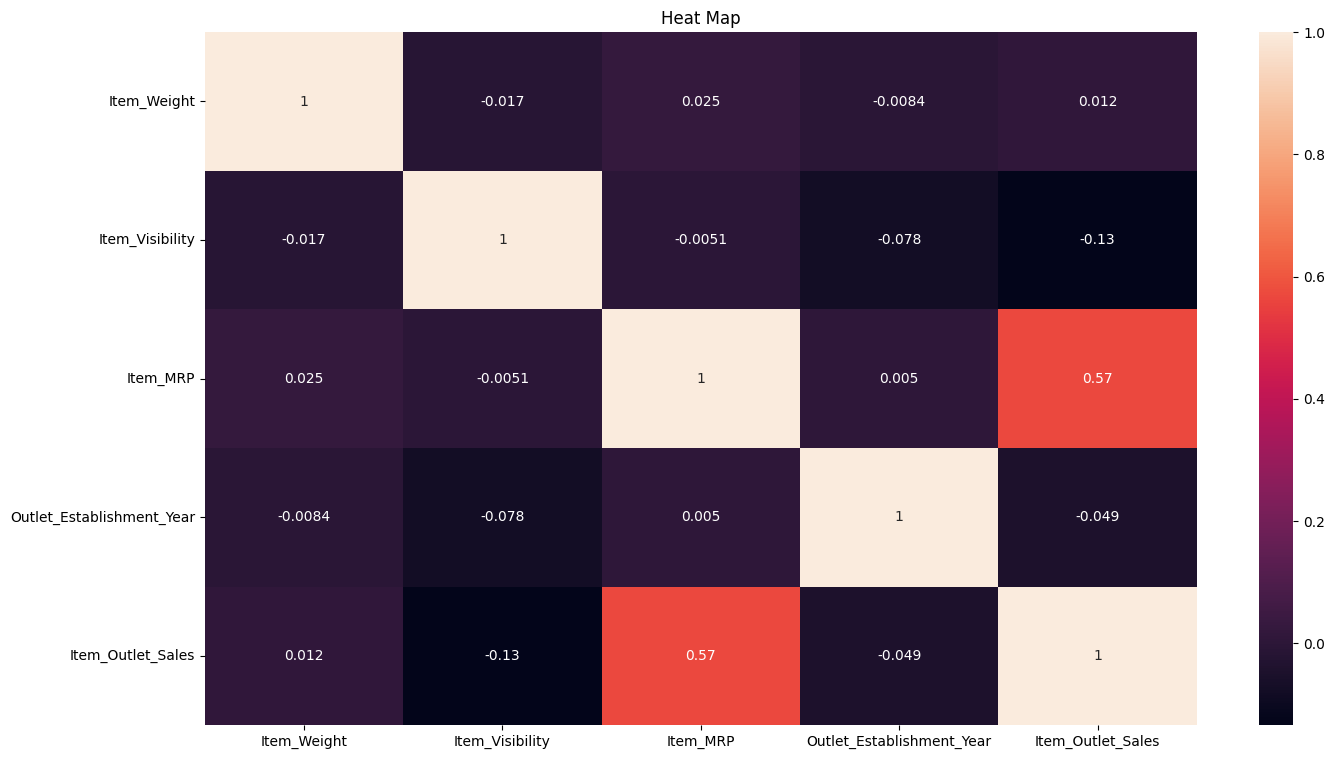

In [120]:
heat_map=df.corr()
plt.figure(figsize= (16,9))
sns.heatmap(heat_map, annot = True,)
plt.title('Heat Map')
plt.show()
# plt.savefig('HeatMap.png')

Text(0.5, 1.0, 'Outlet Sales')

<Figure size 900x800 with 0 Axes>

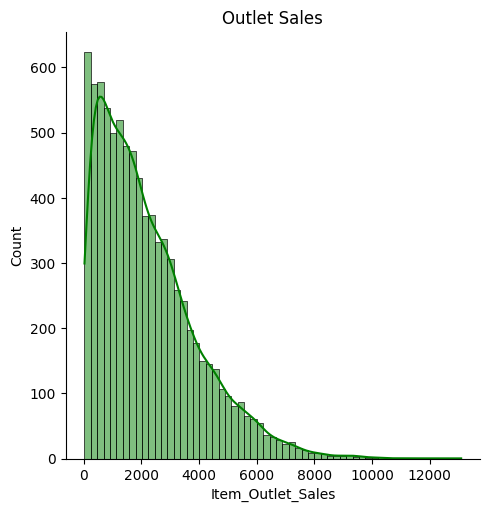

In [121]:
plt.figure(figsize=(9, 8))
sns.displot(df['Item_Outlet_Sales'], color='g',kde=True)
plt.title("Outlet Sales")

array([[<AxesSubplot: title={'center': 'Item_Weight'}>,
        <AxesSubplot: title={'center': 'Item_Visibility'}>],
       [<AxesSubplot: title={'center': 'Item_MRP'}>,
        <AxesSubplot: title={'center': 'Outlet_Establishment_Year'}>],
       [<AxesSubplot: title={'center': 'Item_Outlet_Sales'}>,
        <AxesSubplot: >]], dtype=object)

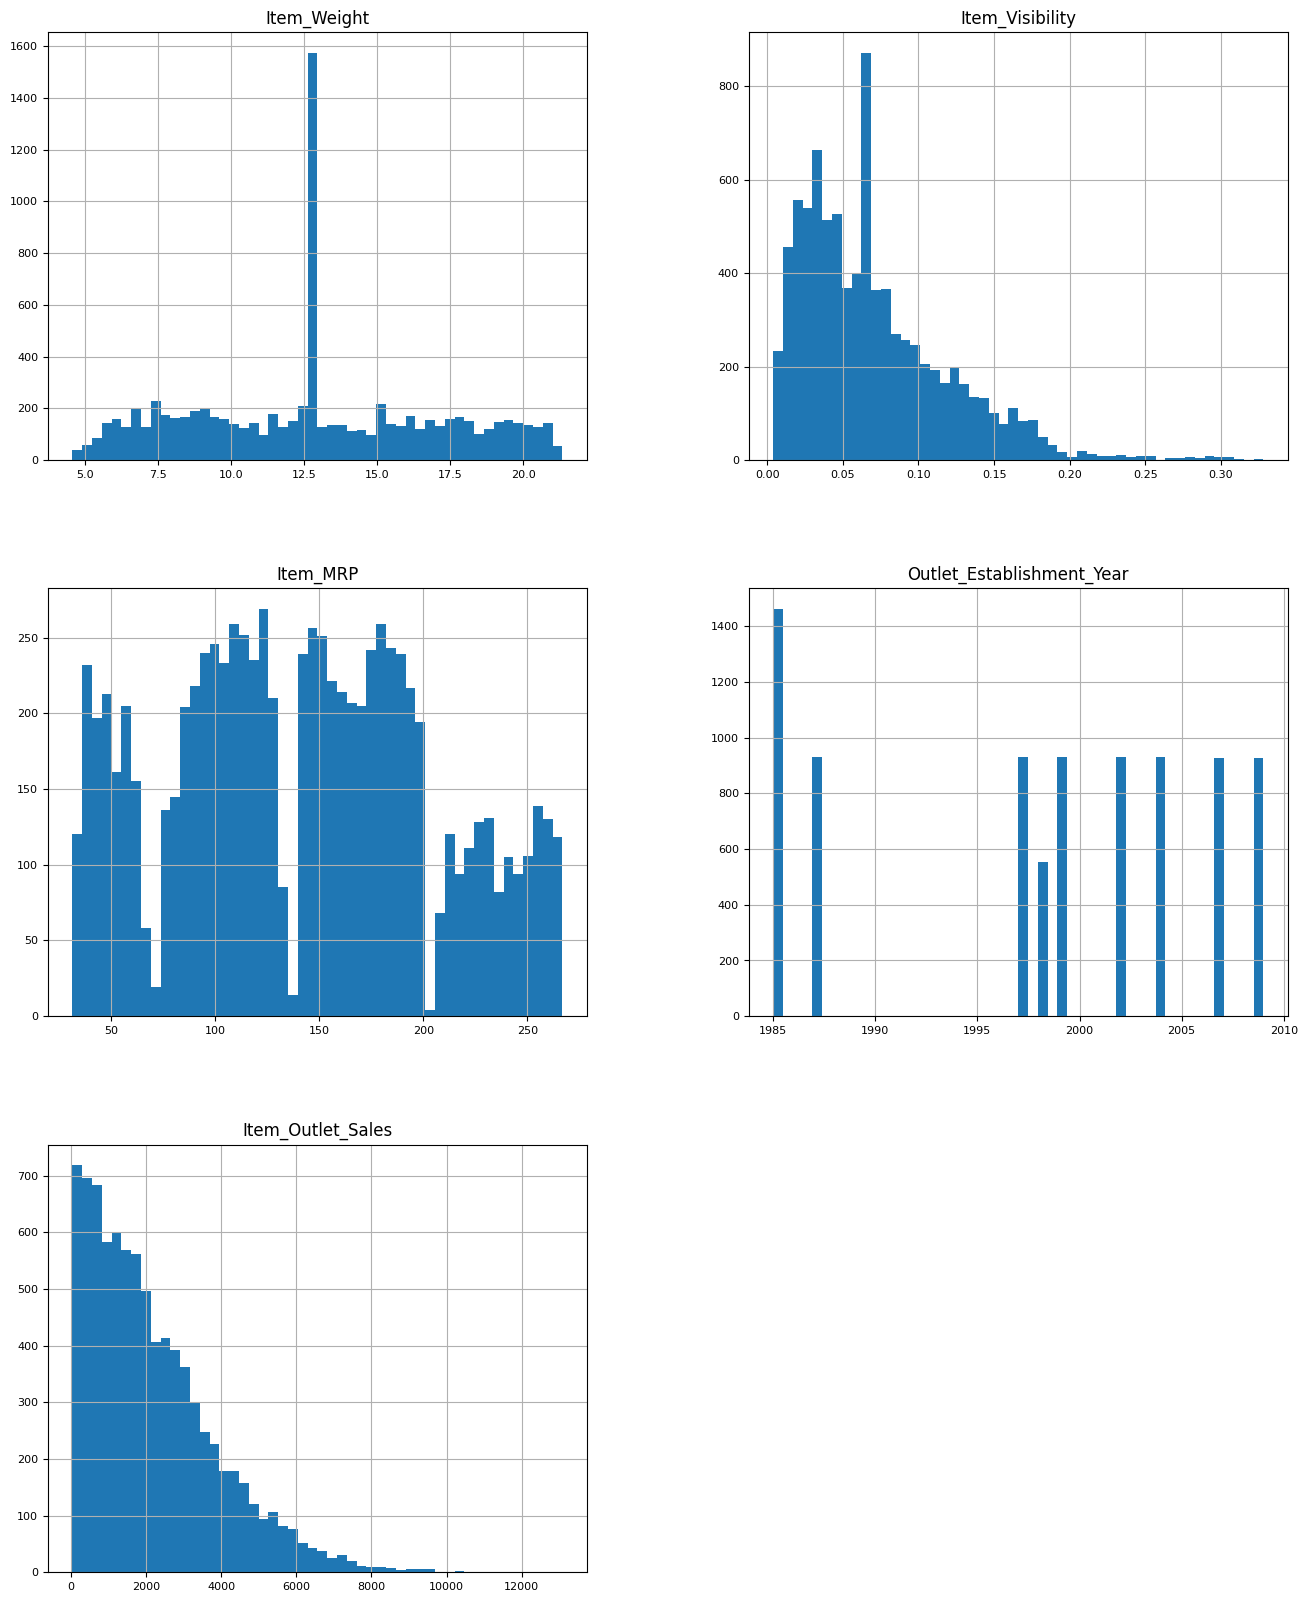

In [122]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [123]:
# sns.pairplot(df)
# plt.show()

Text(0.5, 1.0, 'Item Weight')

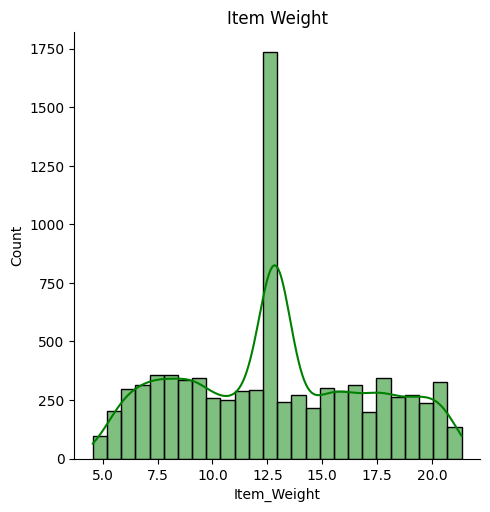

In [124]:
sns.displot(df['Item_Weight'], color='g',kde=True)
plt.title("Item Weight")
# plt.savefig('USales.png')      
        

Text(0.5, 1.0, 'Item Visibility')

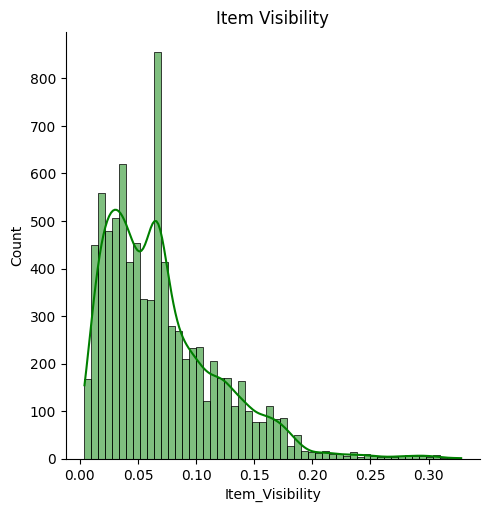

In [125]:
sns.displot(df['Item_Visibility'], color='g',kde=True)
plt.title("Item Visibility")
# plt.savefig('UItem_visibility.png')

Text(0.5, 1.0, 'Outlet Establishment Year')

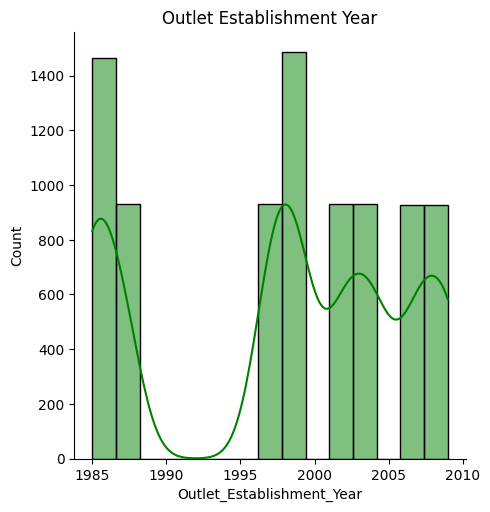

In [126]:
sns.displot(df['Outlet_Establishment_Year'], color='g',kde=True)
plt.title("Outlet Establishment Year")
# plt.savefig('UOutlet_Est.png')

Text(0.5, 1.0, 'Item Mrp')

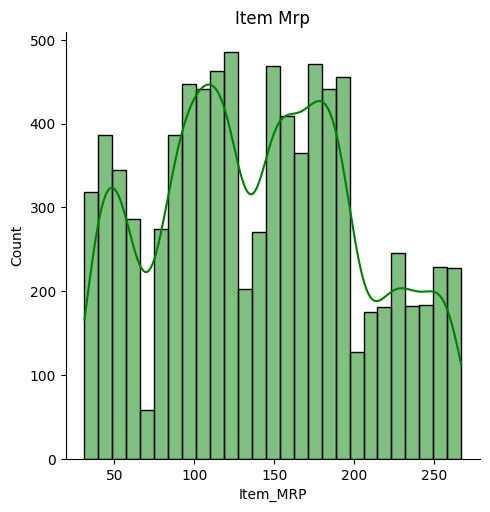

In [127]:
sns.displot(df['Item_MRP'], color='g',kde=True)
plt.title("Item Mrp")
# plt.savefig('UItem_Mrp.png')
# 'Item_MRP'

Text(0.5, 1.0, 'Item type')

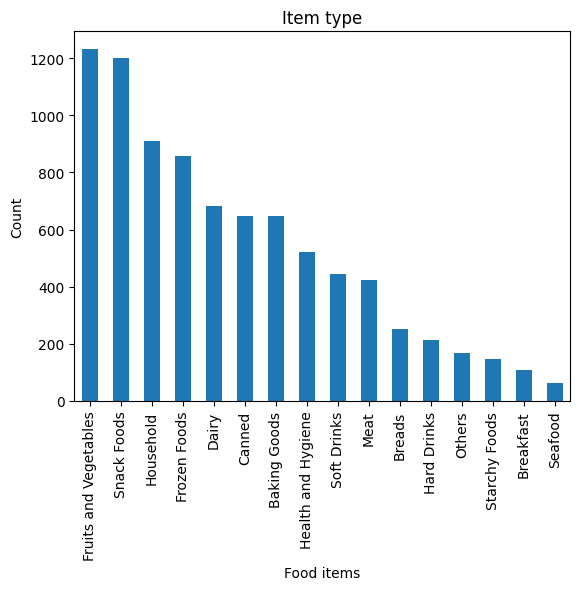

In [128]:

df['Item_Type'].value_counts().plot(kind='bar')
plt.xlabel("Food items")
plt.ylabel("Count")
plt.title("Item type")
# plt.savefig('UItem_type.png')


Text(0.5, 1.0, 'Item Fat Content')

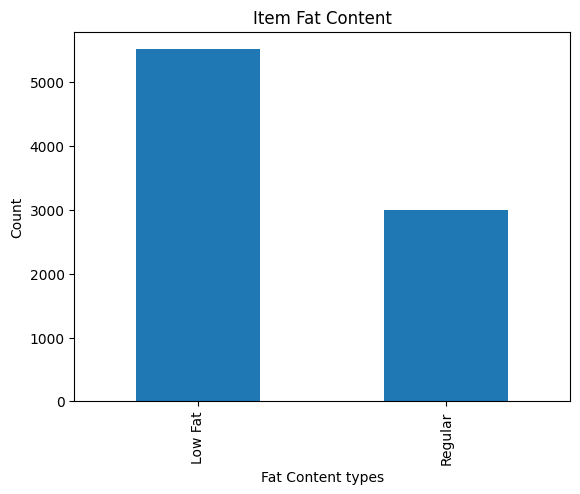

In [129]:
df['Item_Fat_Content'].value_counts().plot(kind='bar')
plt.xlabel("Fat Content types")
plt.ylabel("Count")
plt.title("Item Fat Content")
# plt.savefig('ULow fat.png')


Text(0.5, 1.0, 'Outlet Size')

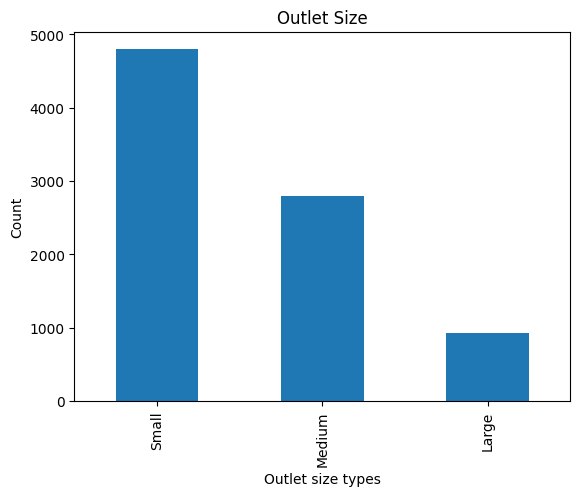

In [130]:
df['Outlet_Size'].value_counts().plot(kind='bar')
plt.xlabel("Outlet size types")
plt.ylabel("Count")
plt.title("Outlet Size")
# plt.savefig('UoutletSize.png')

Text(0.5, 1.0, 'Outlet Type')

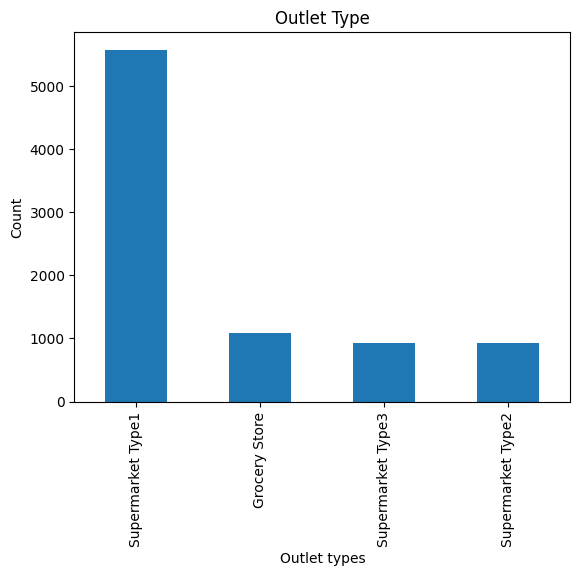

In [131]:
df['Outlet_Type'].value_counts().plot(kind='bar')
plt.xlabel("Outlet types")
plt.ylabel("Count")
plt.title("Outlet Type")
# plt.savefig('Uoutlettype.png')

Text(0.5, 1.0, 'Outlet Location')

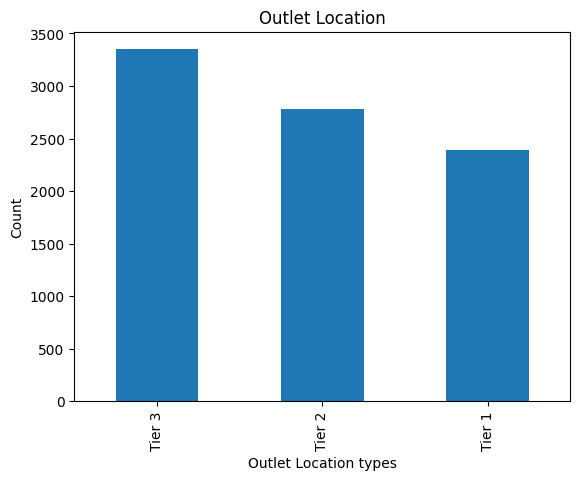

In [132]:
df['Outlet_Location_Type'].value_counts().plot(kind='bar')
plt.xlabel("Outlet Location types")
plt.ylabel("Count")
plt.title("Outlet Location")
# plt.savefig('Uoutletlocation.png')

<AxesSubplot: title={'center': 'Outlet Identifier'}, xlabel='outlets', ylabel='count'>

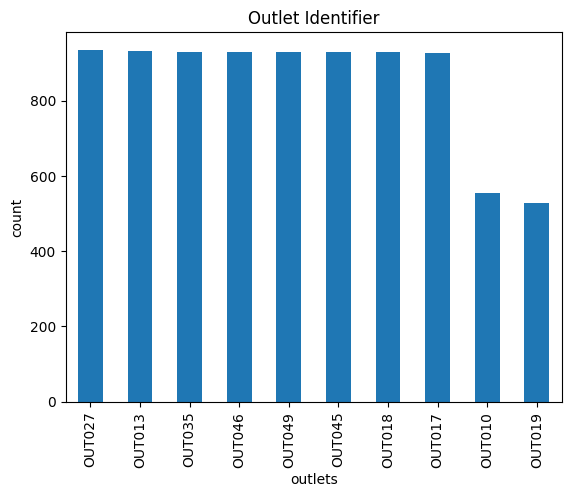

In [133]:
df['Outlet_Identifier'].value_counts().plot(kind='bar',title="Outlet Identifier",xlabel="outlets",ylabel='count')

# plt.savefig('Uoutletidentifier.png')

In [134]:
plt.show()

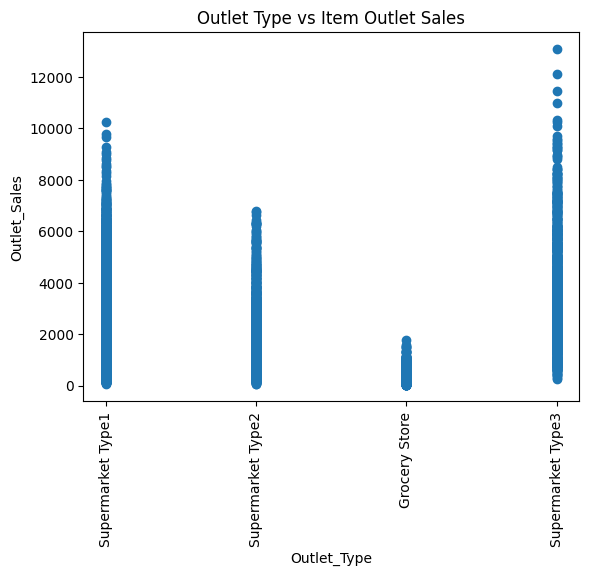

In [135]:
# plt.figure(figsize=(16,19))
# ef=df.groupby(['Item_Outlet_Sales','Outlet_Type',]).size()
# ef=ef.unstack()
# ef.plot(kind='bar',figsize=(6,9))

# df.plot(x=df['Outlet_Type'], y='col_name_2')
# plt.scatter(df['Outlet_Type'],df['Item_Outlet_Sales'] )



plt.scatter(df['Outlet_Type'],df['Item_Outlet_Sales'],)
# plt.setp
plt.xticks(rotation=90)
plt.title("Outlet Type vs Item Outlet Sales")
plt.xlabel('Outlet_Type')
plt.ylabel('Outlet_Sales')
plt.show()
# plt.savefig('Boutltet_type&sales.png')



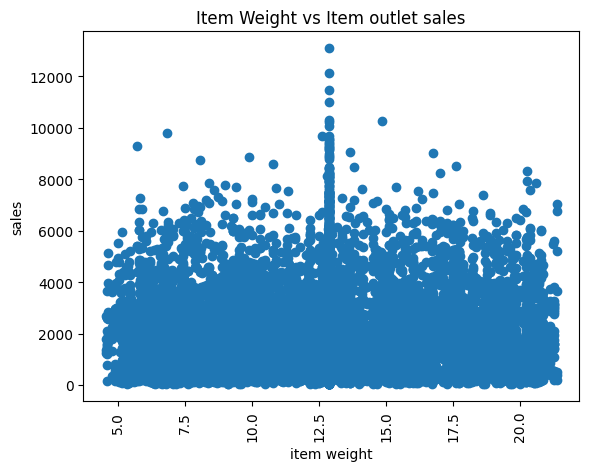

In [136]:
from matplotlib.pyplot import xlabel, ylabel


# plt.scatter(df['Item_Weight'],df['Item_Outlet_Sales'])


plt.scatter(df['Item_Weight'],df['Item_Outlet_Sales'],)
# plt.setp
plt.xticks(rotation=90)
plt.title("Item Weight vs Item outlet sales")
plt.xlabel("item weight")
plt.ylabel("sales")
plt.show()
# plt.savefig('Boutltet_weight&sales.png')

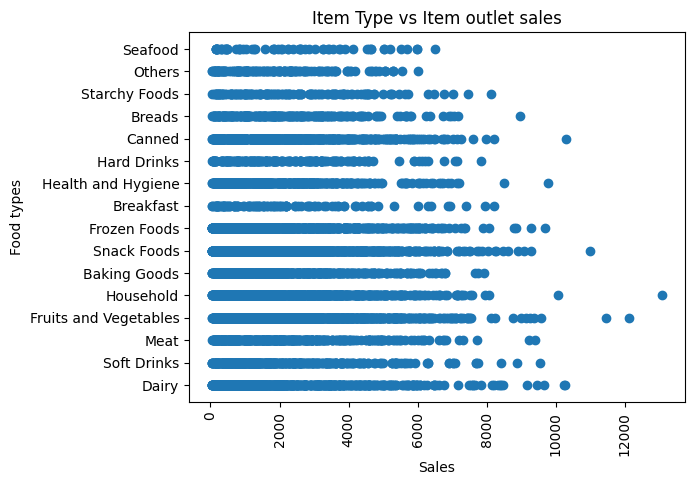

In [137]:
# df.plot(x='Item_Type', y='Item_Outlet_Sales', style='o')

plt.scatter(df['Item_Outlet_Sales'],df['Item_Type'])


# plt.bar(df['Item_Type'],df['Item_Outlet_Sales'],)
# plt.setp
plt.xticks(rotation=90)
plt.title("Item Type vs Item outlet sales")
plt.xlabel("Sales")
plt.ylabel("Food types")
plt.show()
# plt.savefig('Boutltet_item_type&sales.png')
# df.value_counts("Item_Type", "Item_Outlet_Sales")


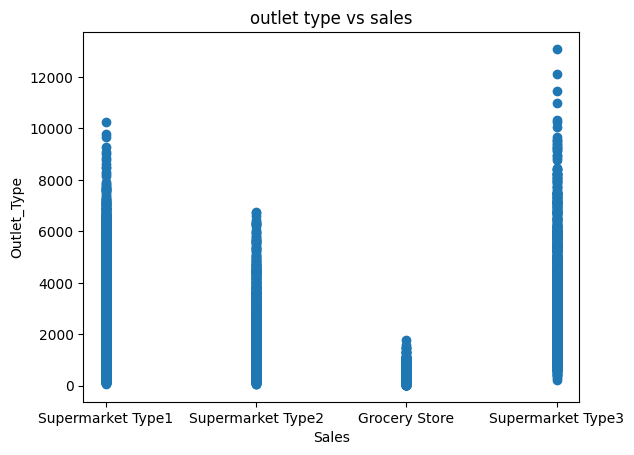

In [138]:
plt.scatter(df['Outlet_Type'],(df['Item_Outlet_Sales']))
plt.xlabel("Sales")
plt.ylabel("Outlet_Type")
plt.title("outlet type vs sales")
# plt.bar(df['Item_Type'],df['Item_Weight'])
# # plt.setp
# plt.xticks(rotation=90)
plt.show()
# plt.savefig('Boutltet_type&sales.png')
# plt.setp(df.get_xticklabels(), rotation=30, horizontalalignment='right')


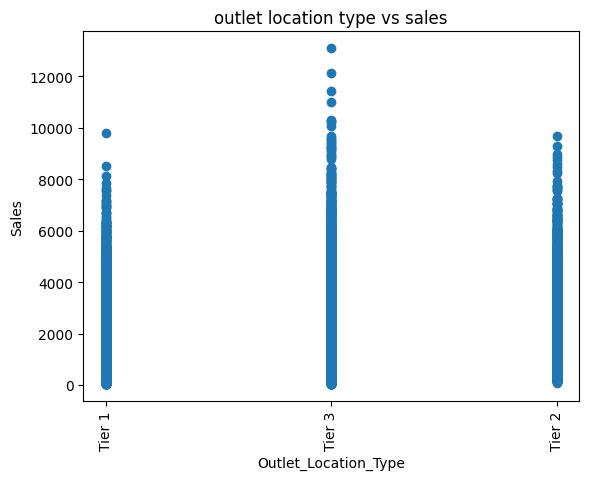

In [139]:

# plt.scatter(df['Item_Outlet_Sales'],df['Item_Type'])

plt.scatter(df['Outlet_Location_Type'],df['Item_Outlet_Sales'],)
# plt.setp
plt.xticks(rotation=90)
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Sales")
plt.title("outlet location type vs sales")
plt.show()
# plt.savefig('Boutltet_loc&sales.png')


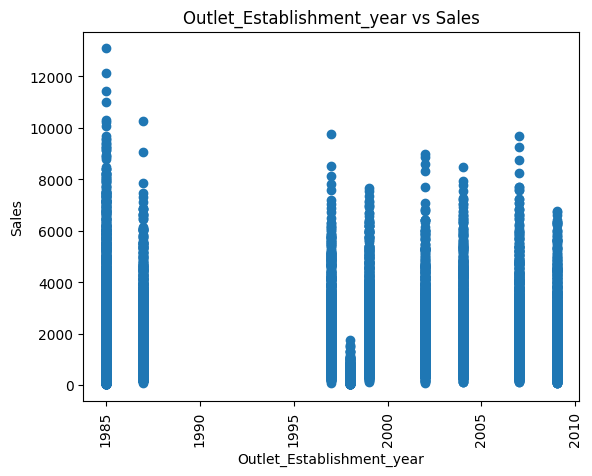

In [140]:

plt.scatter(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'],)
# plt.setp
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.xlabel('Outlet_Establishment_year')
plt.title("Outlet_Establishment_year vs Sales")
# plt.savefig('Outlet_Establishment_year  vs Sales.png')
plt.show()

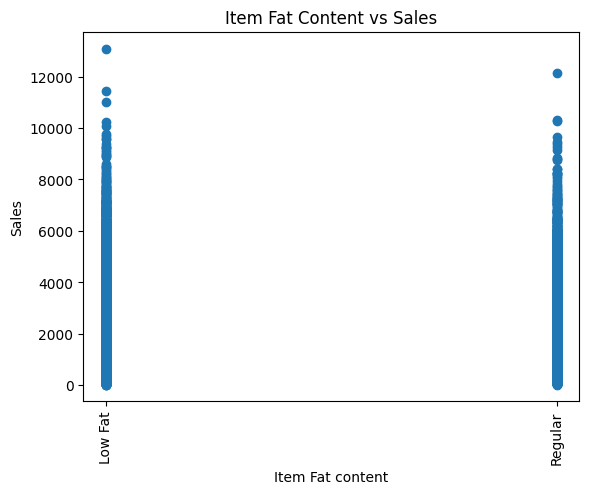

In [141]:

plt.scatter(df['Item_Fat_Content'],df['Item_Outlet_Sales'])
# plt.setp
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.xlabel('Item Fat content')
plt.title("Item Fat Content vs Sales")
# plt.savefig('Item Fat Content  vs Sales.png')
plt.show()

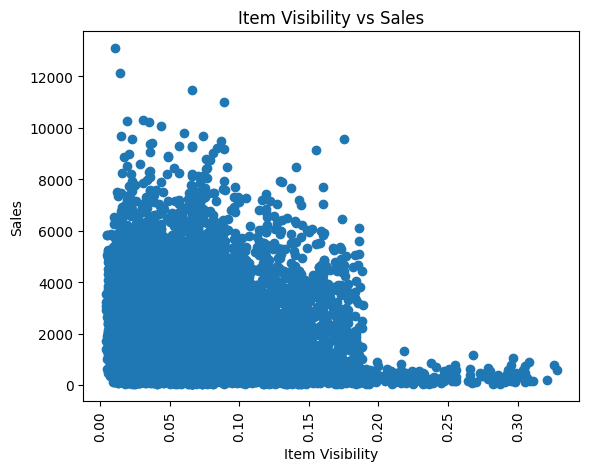

In [142]:
plt.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'])
# plt.setp
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.xlabel('Item Visibility')
plt.title("Item Visibility vs Sales")
# plt.savefig('Item Visibility  vs Sales.png')
plt.show()

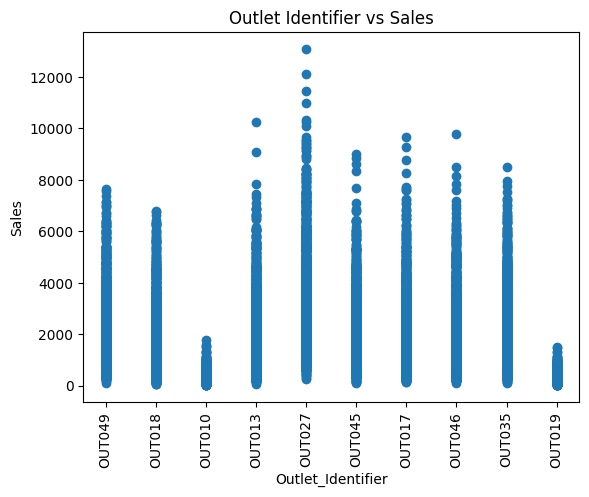

In [143]:
plt.scatter(df['Outlet_Identifier'],df['Item_Outlet_Sales'])
# plt.setp
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.xlabel('Outlet_Identifier')
plt.title("Outlet Identifier vs Sales")
# plt.savefig('Outlet Identifier vs Sales.png')
plt.show()

Text(0.5, 1.0, 'Outlet Size vs Sales')

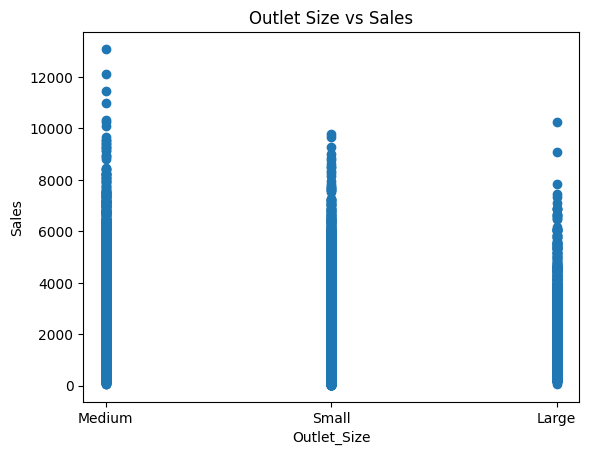

In [144]:

plt.scatter(df['Outlet_Size'],df['Item_Outlet_Sales'])
plt.ylabel('Sales')
plt.xlabel('Outlet_Size')
plt.title("Outlet Size vs Sales")
# plt.savefig('Outlet Size vs Sales.png')
# plt.setp
# plt.xticks(rotation=90)
# plt.show()

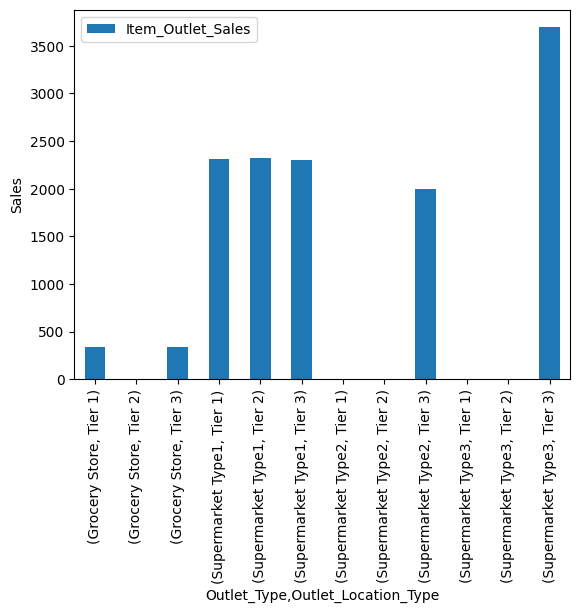

In [145]:
df.groupby(['Outlet_Type','Outlet_Location_Type']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
plt.ylabel('Sales')
X=plt.gca().xaxis

Text(0, 0.5, 'Sales')

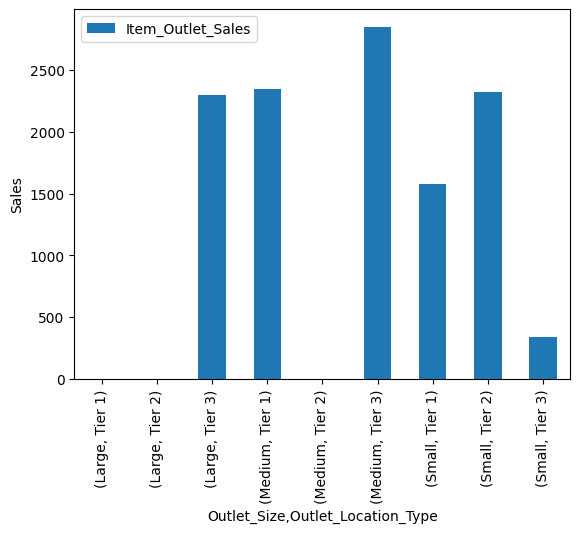

In [146]:
df.groupby(['Outlet_Size','Outlet_Location_Type']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
plt.ylabel('Sales')

In [147]:
# df.pairplot()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.017,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


DATA CLEANING (ENCODING AND OUTLIER DECTECTION)

In [148]:

df['Item_Type']=df['Item_Type'].replace(to_replace =['Dairy','Baking Goods','Meat' ,'Breads',
                                                     'Starchy Foods','Breakfast','Fruits and Vegetables','Household'] ,
                                        value = 'Household_Items')


df['Item_Type']=df['Item_Type'].replace(to_replace =['Seafood' , 'Frozen Foods' , 'Canned','Snack Foods'] ,
                                        value = 'Snack_Items')


df['Item_Type']=df['Item_Type'].replace(to_replace =['Soft Drinks' , 'Hard Drinks','Health and Hygiene','Others'] ,
                                        value = 'Other_Items')



df['Outlet_Establishment_Year'] = 2022 - df['Outlet_Establishment_Year']


columns = df.select_dtypes(['category']).columns
df[columns] = df[columns].apply(lambda x: x.cat.codes)


df
# df.columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016,0,249.8092,9,23,1,0,1,3735.1380
1,DRC01,5.92,1,0.019,2,48.2692,3,13,1,2,2,443.4228
2,FDN15,17.50,0,0.017,0,141.6180,9,23,1,0,1,2097.2700
3,FDX07,19.20,1,0.066,0,182.0950,0,24,2,2,0,732.3800
4,NCD19,8.93,0,0.066,0,53.8614,1,35,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.87,0,0.057,1,214.5218,1,35,0,2,1,2778.3834
8519,FDS36,8.38,1,0.047,0,108.1570,7,20,2,1,1,549.2850
8520,NCJ29,10.60,0,0.035,2,85.1224,6,18,2,1,1,1193.1136
8521,FDN46,7.21,1,0.145,1,103.1332,3,13,1,2,2,1845.5976


In [149]:
enc=OneHotEncoder()
onehot1=pd.DataFrame(enc.fit_transform(df[['Outlet_Size']]).toarray())

df['Outlet_Large']=onehot1[0]
df['Outlet_Medium']=onehot1[1]
df['Outlet_Small']=onehot1[2]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,FDA15,9.30,0,0.016,0,249.8092,9,23,1,0,1,3735.1380,0.0,1.0,0.0
1,DRC01,5.92,1,0.019,2,48.2692,3,13,1,2,2,443.4228,0.0,1.0,0.0
2,FDN15,17.50,0,0.017,0,141.6180,9,23,1,0,1,2097.2700,0.0,1.0,0.0
3,FDX07,19.20,1,0.066,0,182.0950,0,24,2,2,0,732.3800,0.0,0.0,1.0
4,NCD19,8.93,0,0.066,0,53.8614,1,35,0,2,1,994.7052,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.87,0,0.057,1,214.5218,1,35,0,2,1,2778.3834,1.0,0.0,0.0
8519,FDS36,8.38,1,0.047,0,108.1570,7,20,2,1,1,549.2850,0.0,0.0,1.0
8520,NCJ29,10.60,0,0.035,2,85.1224,6,18,2,1,1,1193.1136,0.0,0.0,1.0
8521,FDN46,7.21,1,0.145,1,103.1332,3,13,1,2,2,1845.5976,0.0,1.0,0.0


In [150]:
df.drop(['Outlet_Size'],axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,FDA15,9.30,0,0.016,0,249.8092,9,23,0,1,3735.1380,0.0,1.0,0.0
1,DRC01,5.92,1,0.019,2,48.2692,3,13,2,2,443.4228,0.0,1.0,0.0
2,FDN15,17.50,0,0.017,0,141.6180,9,23,0,1,2097.2700,0.0,1.0,0.0
3,FDX07,19.20,1,0.066,0,182.0950,0,24,2,0,732.3800,0.0,0.0,1.0
4,NCD19,8.93,0,0.066,0,53.8614,1,35,2,1,994.7052,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.87,0,0.057,1,214.5218,1,35,2,1,2778.3834,1.0,0.0,0.0
8519,FDS36,8.38,1,0.047,0,108.1570,7,20,1,1,549.2850,0.0,0.0,1.0
8520,NCJ29,10.60,0,0.035,2,85.1224,6,18,1,1,1193.1136,0.0,0.0,1.0
8521,FDN46,7.21,1,0.145,1,103.1332,3,13,2,2,1845.5976,0.0,1.0,0.0


In [151]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,FDA15,9.30,0,0.016,0,249.8092,9,23,1,0,1,3735.1380,0.0,1.0,0.0
1,DRC01,5.92,1,0.019,2,48.2692,3,13,1,2,2,443.4228,0.0,1.0,0.0
2,FDN15,17.50,0,0.017,0,141.6180,9,23,1,0,1,2097.2700,0.0,1.0,0.0
3,FDX07,19.20,1,0.066,0,182.0950,0,24,2,2,0,732.3800,0.0,0.0,1.0
4,NCD19,8.93,0,0.066,0,53.8614,1,35,0,2,1,994.7052,1.0,0.0,0.0


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

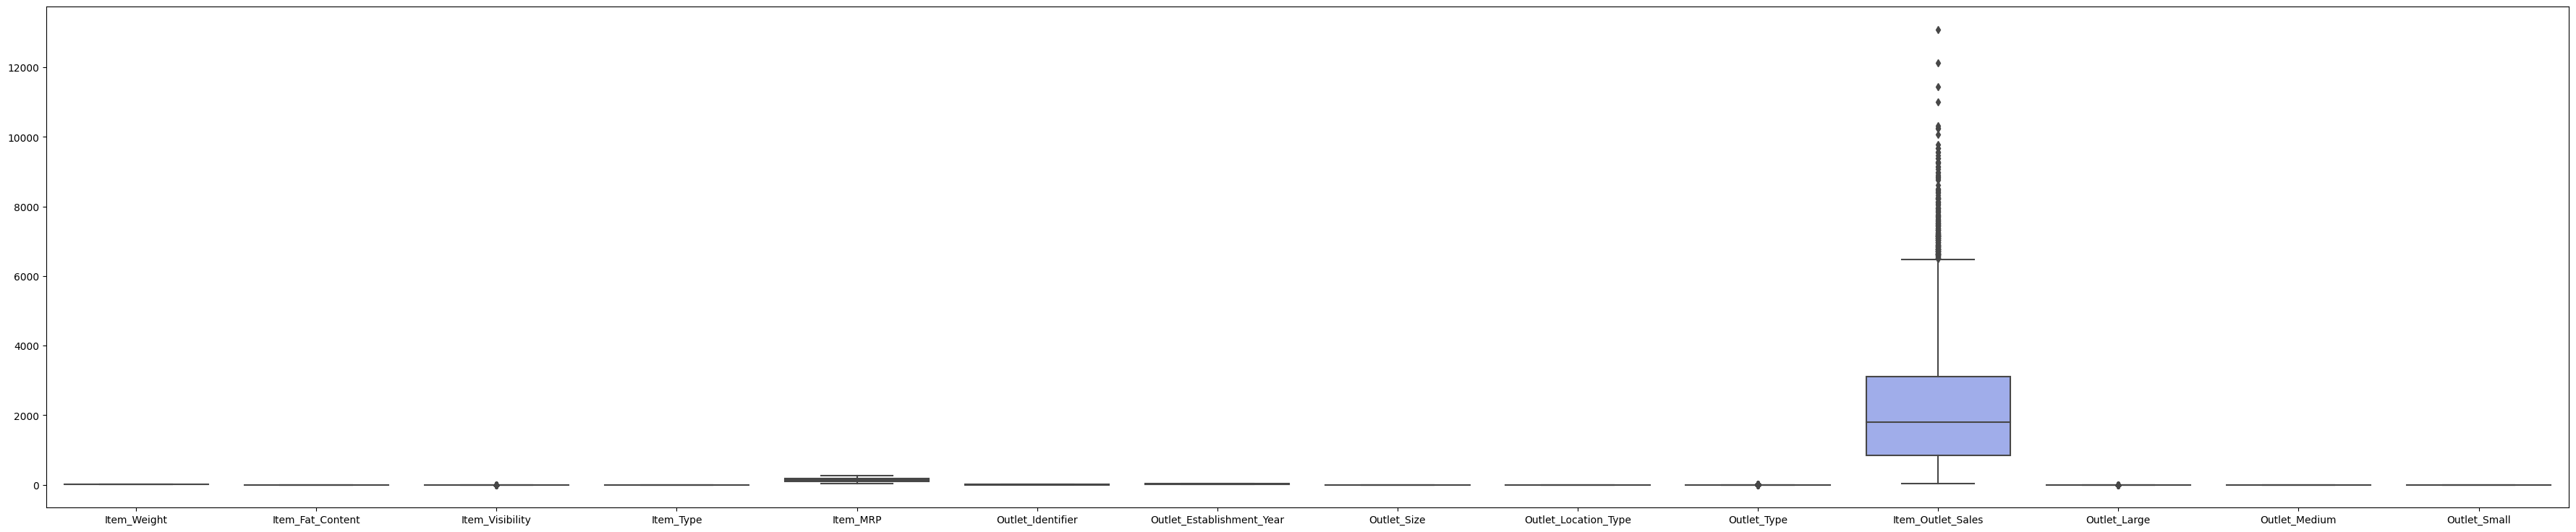

In [152]:
plt.figure(figsize= (45,9))
# plt.figure(figsize= (35,19))
sns.boxplot(data=df)
# plt.savefig('Outliers1.png')

In [153]:
def removeOutliers(dataframe):
    
    a1 = np.quantile(dataframe, 0.25)
    a2 = np.quantile(dataframe, 0.75)
    
    IQR = a2-a1
 
    low = a1 - 1.5 * IQR
    high = a2 + 1.5 * IQR
    
    return low,high
    
 

l1,h1=removeOutliers(df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']= np.where(df['Item_Outlet_Sales']>h1,h1,df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']= np.where(df['Item_Outlet_Sales']<l1,l1,df['Item_Outlet_Sales'])

# l2,h2=removeOutliers(df['Item_Visibility'])
# df['Item_Visibility']= np.where(df['Item_Visibility']>h2,h2,df['Item_Visibility'])
# df['Item_Visibility']= np.where(df['Item_Visibility']<l2,l2,df['Item_Visibility'])


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

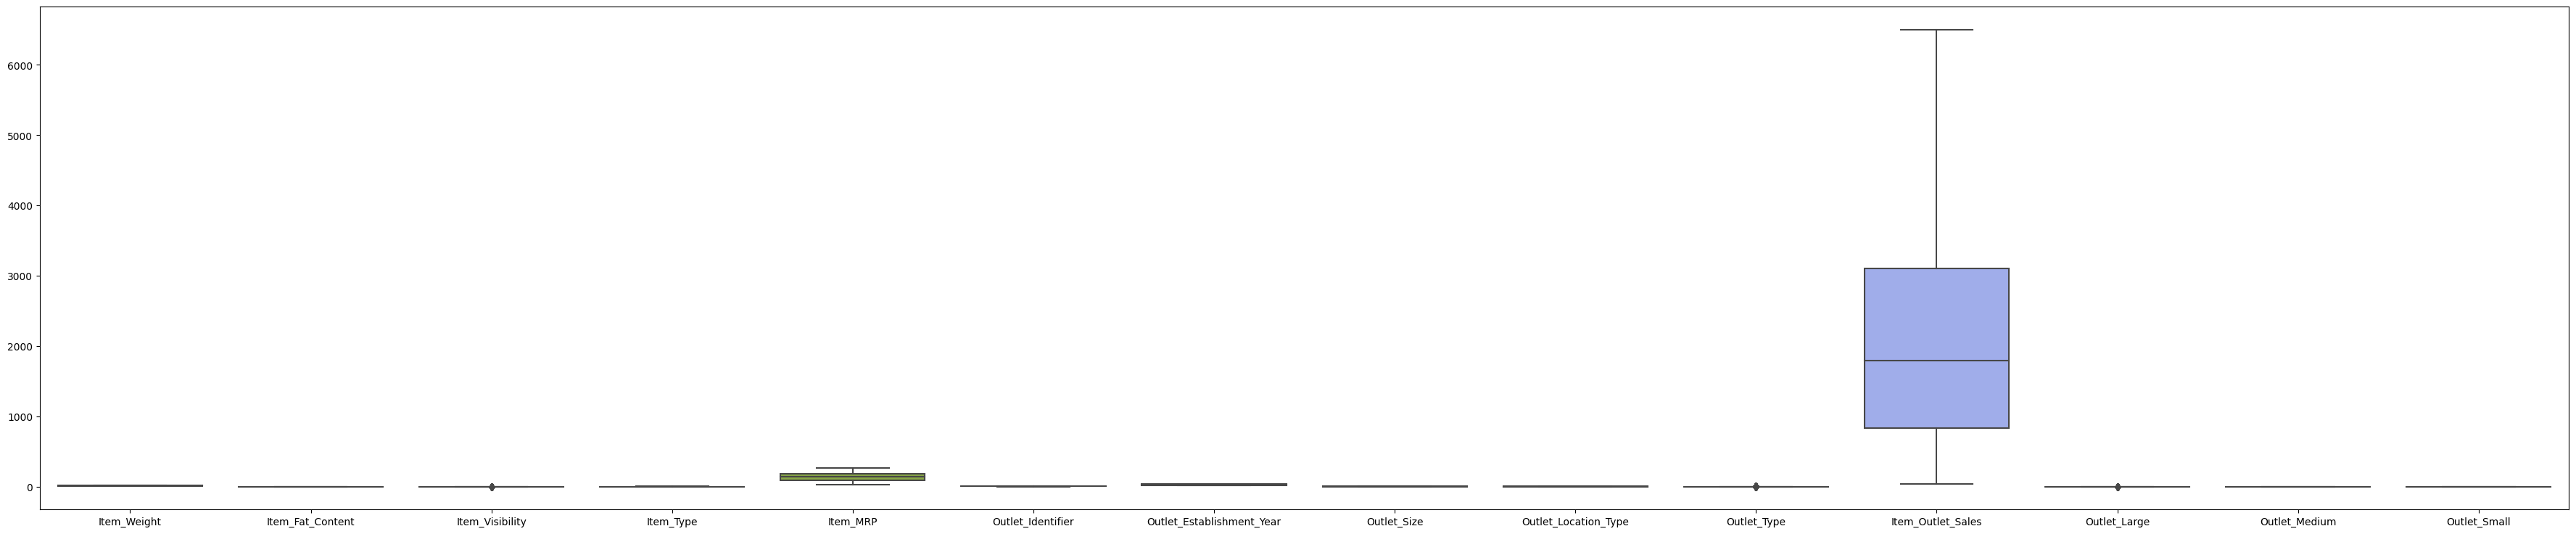

In [154]:
plt.figure(figsize= (45,9))
# plt.figure(figsize= (35,19))
sns.boxplot(data=df)
# plt.savefig('Outliers2.png')

In [155]:

normalize_numbers=['Item_Weight','Item_Visibility','Item_MRP']

# min_d = np.min(df)
# max_d = np.max(df)

# normalized_d = (df - min_d) / (max_d - min_d)
minimum=df[normalize_numbers].min()
maximum=df[normalize_numbers].max()



# df.head()
# for i in df.columns:
#     df[i] =np.log(df[i])


In [156]:
df[normalize_numbers]=(df[normalize_numbers]-df[normalize_numbers].min())/(df[normalize_numbers].max()-df[normalize_numbers].min())


# df[normalize_numbers] = df[normalize_numbers] * (maximum - minimum) + minimum
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,FDA15,0.282738,0,0.037037,0,0.927507,9,23,1,0,1,3735.1380,0.0,1.0,0.0
1,DRC01,0.081548,1,0.046296,2,0.072068,3,13,1,2,2,443.4228,0.0,1.0,0.0
2,FDN15,0.770833,0,0.040123,0,0.468288,9,23,1,0,1,2097.2700,0.0,1.0,0.0
3,FDX07,0.872024,1,0.191358,0,0.640093,0,24,2,2,0,732.3800,0.0,0.0,1.0
4,NCD19,0.260714,0,0.191358,0,0.095805,1,35,0,2,1,994.7052,1.0,0.0,0.0


In [157]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,FDA15,0.282738,0,0.037037,0,0.927507,9,23,1,0,1,3735.1380,0.0,1.0,0.0
1,DRC01,0.081548,1,0.046296,2,0.072068,3,13,1,2,2,443.4228,0.0,1.0,0.0
2,FDN15,0.770833,0,0.040123,0,0.468288,9,23,1,0,1,2097.2700,0.0,1.0,0.0
3,FDX07,0.872024,1,0.191358,0,0.640093,0,24,2,2,0,732.3800,0.0,0.0,1.0
4,NCD19,0.260714,0,0.191358,0,0.095805,1,35,0,2,1,994.7052,1.0,0.0,0.0


PHASE-2

In [158]:
X=df.drop(['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
Y=df['Item_Outlet_Sales']



# train_df = df[df['source'] == 'train']
# test_df = df[df['source'] == 'test']

# print(X.head())
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

# X_train = X_train.values.reshape(-1,1)

# X_test = X_test.values.reshape(-1,1)
# X_train
X_train.columns
# y_test
# y_test






Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Outlet_Large', 'Outlet_Medium', 'Outlet_Small'],
      dtype='object')

In [159]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sklearn
# sklearn.metrics.get_scorer_names()


In [160]:
import plotly.express as px

rmse_values={}
mae_values={}
r2_score_values={}

def model_details(model,name):
    
    model.fit(X_train,Y_train)
        
   
    
    predicted_train = model.predict(X_train)
    
    #Perform cross-validation:
    cv_score = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    predicted_trained_values=pd.DataFrame(predicted_train,columns=['predicted_train'])
    Y_trained_values=list(Y_train.values)
    predicted_trained_values['Y_trained_values']=Y_trained_values
    dataframe=predicted_trained_values
    dataframe=dataframe.iloc[:15]
    true_value=dataframe['Y_trained_values']
    predicted_value=dataframe['predicted_train']
    plt.plot(true_value)
    plt.plot(predicted_value)
    plt.ylabel('Item Outlet Sales')
    plt.legend(['Actual','Predicted'])
    plt.title(f"Actual vs Predicted in Trained Data for {name}",fontsize=16)
    plt.show()
    plt.savefig(f"train data for {name}")
   
    print(name," Algorithm Model Report for trained Data")
    print("RMSE :",np.sqrt(metrics.mean_squared_error(Y_train, predicted_train)))
    print("MAE",np.sqrt(metrics.mean_absolute_error(Y_train, predicted_train)))
    print("r2_score",metrics.r2_score(Y_train,predicted_train))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
         
         
   
    predicted_test = model.predict(X_test)
    
    predicted_test_values=pd.DataFrame(predicted_test,columns=['predicted_test'])
    true_values=list(Y_test.values)
    predicted_test_values['true_value']=true_values
    dataframe2=predicted_test_values
    dataframe2=dataframe2.iloc[:15]
    true_values=dataframe2['true_value']
    predicted_value_test=dataframe2['predicted_test']
    plt.plot(true_value)
    plt.plot(predicted_value_test)
    plt.ylabel('Item Outlet Sales')
    plt.legend(['Actual','Predicted'])
    plt.title(f"Actual vs Predicted in Test Data for {name}",fontsize=16)
    plt.show()
    plt.savefig(f"test data for {name}")
         
    print(name," Algorithm Model Report for test Data") 
    print("RMSE for testing data : " ,np.sqrt(metrics.mean_squared_error(Y_test, predicted_test)))
    print("MAE",np.sqrt(metrics.mean_absolute_error(Y_test, predicted_test))) 
    print("r2_score",metrics.r2_score(Y_test,predicted_test)) 
    
    
    
    
    if(name not in rmse_values):
        rmse_values[name]=np.sqrt(metrics.mean_squared_error(Y_test, predicted_test))
        
    if(name not in mae_values):
        mae_values[name]=metrics.mean_absolute_error(Y_test, predicted_test)
        
    if(name not in r2_score_values):
        r2_score_values[name]=r2_score(Y_test, predicted_test) 
        

# coef=pd.Series(model2.coef_,X_train.columns).sort_values()
# coef.plot(kind='bar',title='model coefficients')
   
        
    
        
    # plt.plot(Y_train)
    # plt.plot(predicted_train)
    # plt.ylabel('Item Outlet Sales')
    # plt.legend(['Actual Values','Predicted Values'])
    # plt.title("Actual values vs Predicted values ",fontsize=16)
    # plt.show()
    # plt.savefig(name)
    
    
  

    

In [161]:
def residual_loss(model,name):
        residue = Y_test - model.predict(X_test)
        plt.scatter(Y_test,residue, c = "blue")
        plt.xlabel(f"Residual Plot for {name}")
        plt.ylabel("y_test")
        plt.axhline(y = 0)
        plt.savefig(f"residual {name}")
       

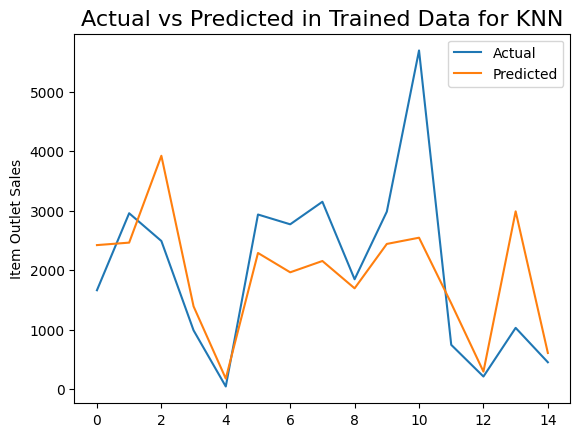

KNN  Algorithm Model Report for trained Data
RMSE : 982.0487289574211
MAE 26.729131942290675
r2_score 0.629541596881424
CV Score : Mean - 1036 | Std - 23.61 | Min - 1013 | Max - 1083


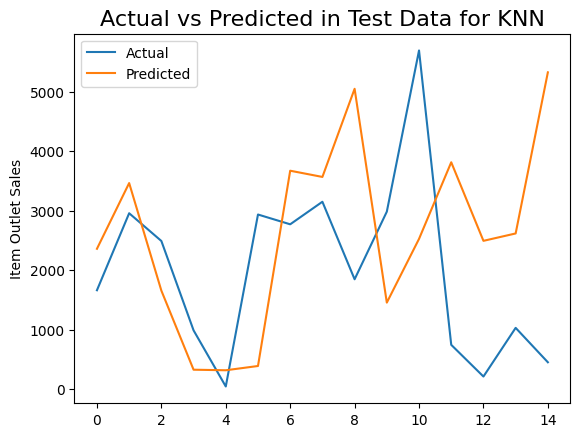

KNN  Algorithm Model Report for test Data
RMSE for testing data :  1081.1441338527925
MAE 28.04457585821987
r2_score 0.5799793625461893


<Figure size 640x480 with 0 Axes>

In [162]:

model1=neighbors.KNeighborsRegressor(n_neighbors = 20)
model_details(model1,"KNN")




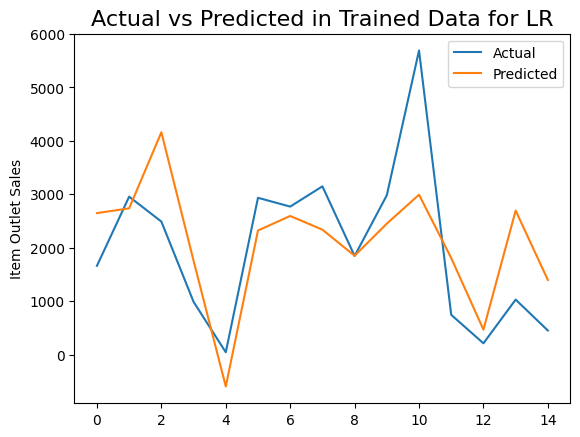

LR  Algorithm Model Report for trained Data
RMSE : 1085.269224607633
MAE 28.864634061095398
r2_score 0.5475731717512999
CV Score : Mean - 1087 | Std - 26.13 | Min - 1041 | Max - 1126


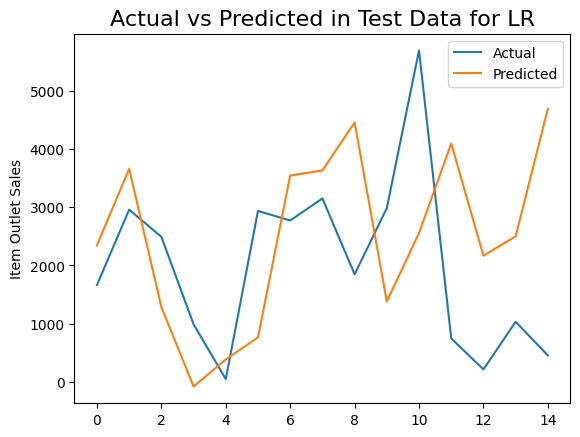

LR  Algorithm Model Report for test Data
RMSE for testing data :  1146.5475367475406
MAE 29.596731677495647
r2_score 0.5276242782448466


<AxesSubplot: title={'center': 'model coefficients'}>

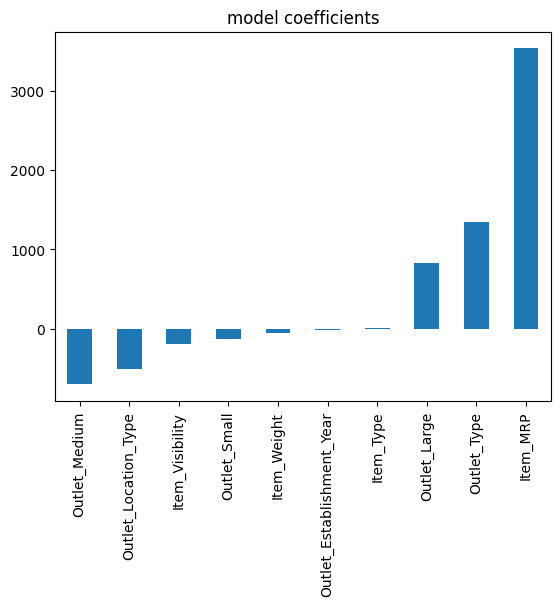

In [163]:
model2= LinearRegression()
model2.fit(X_train,Y_train)

model_details(model2,"LR")

coef=pd.Series(model2.coef_,X_train.columns).sort_values()
coef.plot(kind='bar',title='model coefficients') 


# residual_loss(model2)


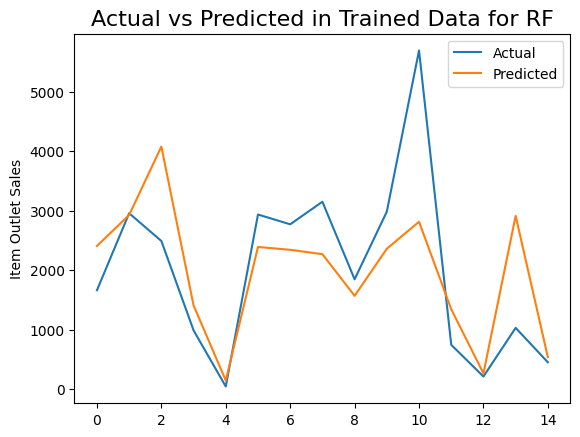

RF  Algorithm Model Report for trained Data
RMSE : 991.3109095975869
MAE 26.788004719319158
r2_score 0.6225206956643907
CV Score : Mean - 1009 | Std - 31.21 | Min - 952.7 | Max - 1060


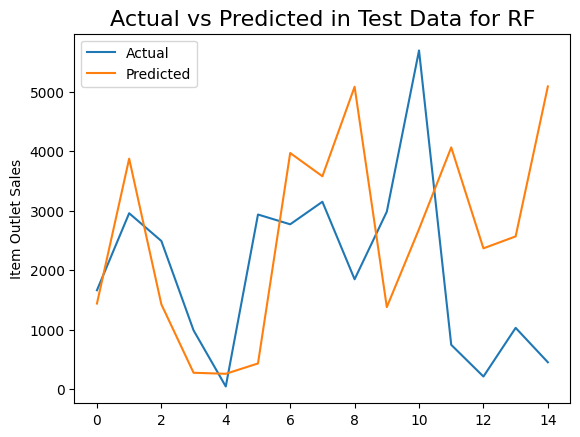

RF  Algorithm Model Report for test Data
RMSE for testing data :  1064.7066027391145
MAE 27.761538077485305
r2_score 0.5926541164199648


<AxesSubplot: title={'center': 'Model Coefficients for train data'}>

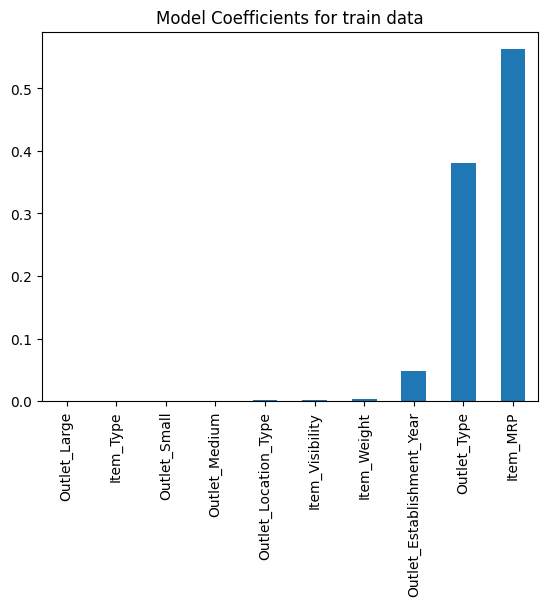

In [164]:
model3= RandomForestRegressor(n_estimators=400,max_depth=7, min_samples_leaf=100,n_jobs=4)
model_details(model3,"RF")
coef1 = pd.Series(model3.feature_importances_,X_train.columns).sort_values()
coef1.plot(kind='bar', title='Model Coefficients for train data')



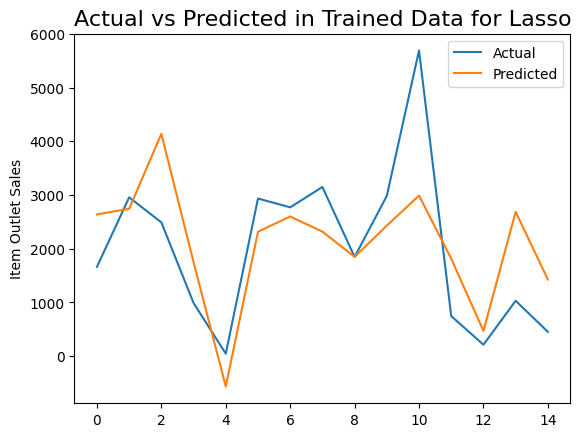

Lasso  Algorithm Model Report for trained Data
RMSE : 1085.322612321984
MAE 28.861638417914705
r2_score 0.5475286581360069
CV Score : Mean - 1087 | Std - 26.4 | Min - 1040 | Max - 1127


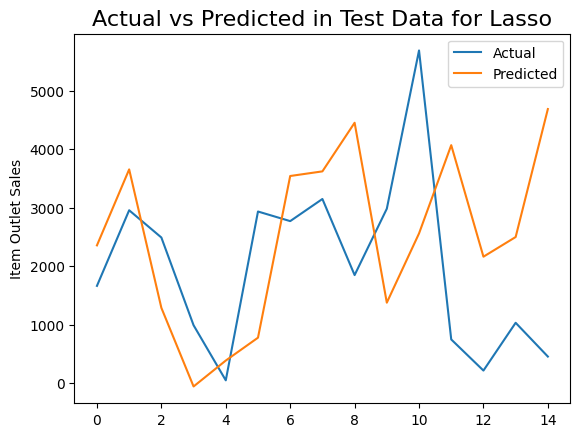

Lasso  Algorithm Model Report for test Data
RMSE for testing data :  1146.5971820788668
MAE 29.597122544663314
r2_score 0.527583369767556


<AxesSubplot: title={'center': 'Model Coefficients'}>

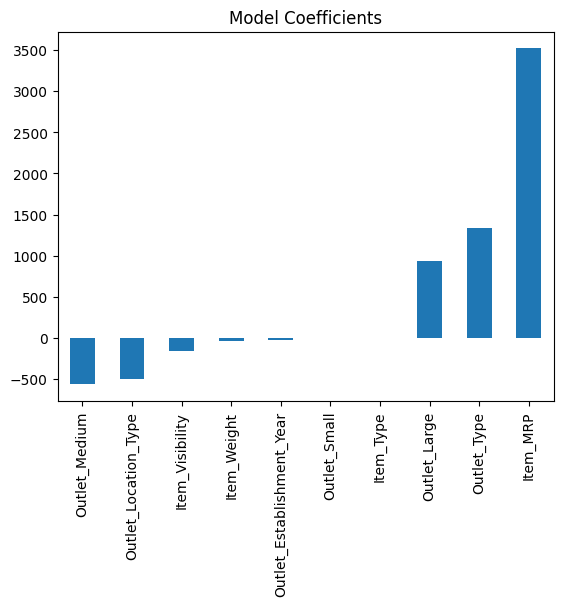

In [165]:
model4= Lasso()
model_details(model4,"Lasso")

coef1 = pd.Series(model4.coef_,X_train.columns).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')



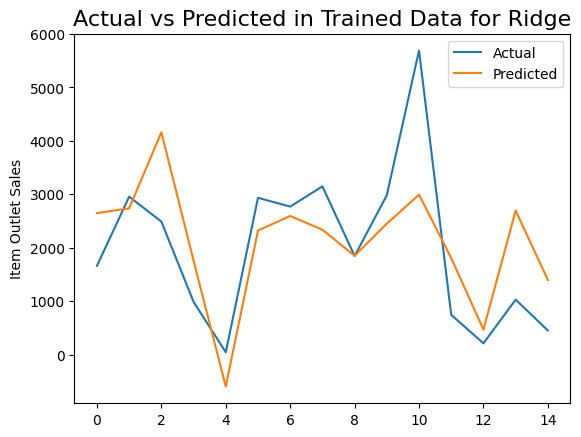

Ridge  Algorithm Model Report for trained Data
RMSE : 1085.2692988382457
MAE 28.864464703794365
r2_score 0.5475731098608102
CV Score : Mean - 1087 | Std - 26.13 | Min - 1041 | Max - 1126


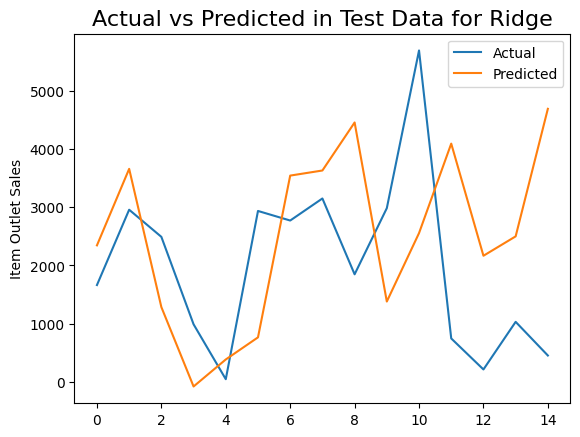

Ridge  Algorithm Model Report for test Data
RMSE for testing data :  1146.5521013509785
MAE 29.59669760726819
r2_score 0.5276205170189635


<Figure size 640x480 with 0 Axes>

In [166]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model5=Ridge(alpha=0.05,normalize=False)
model5 = make_pipeline(StandardScaler(with_mean=False), Ridge())
model_details(model5,"Ridge")




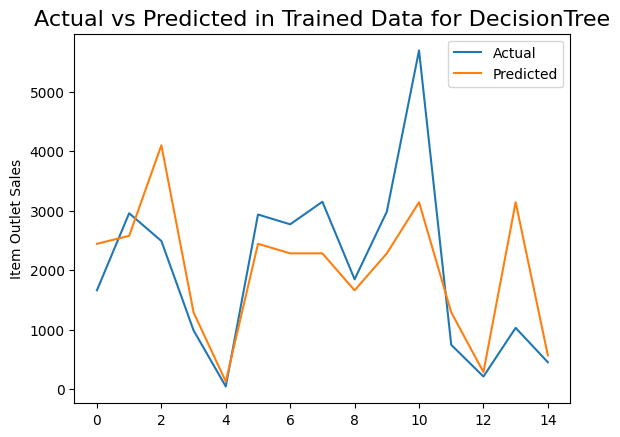

DecisionTree  Algorithm Model Report for trained Data
RMSE : 989.4230485925283
MAE 26.74080094928585
r2_score 0.6239570762874669
CV Score : Mean - 1013 | Std - 32.26 | Min - 956.1 | Max - 1073


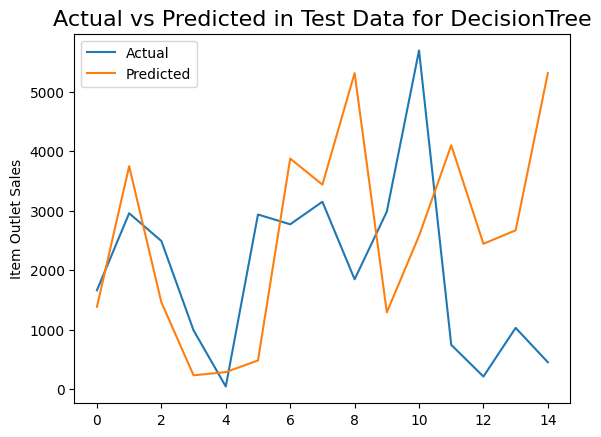

DecisionTree  Algorithm Model Report for test Data
RMSE for testing data :  1067.1440381120428
MAE 27.74783507514294
r2_score 0.5907869057470214


<Figure size 640x480 with 0 Axes>

In [167]:
model6 = DecisionTreeRegressor(max_depth=7, min_samples_leaf=100)
model_details(model6,"DecisionTree")


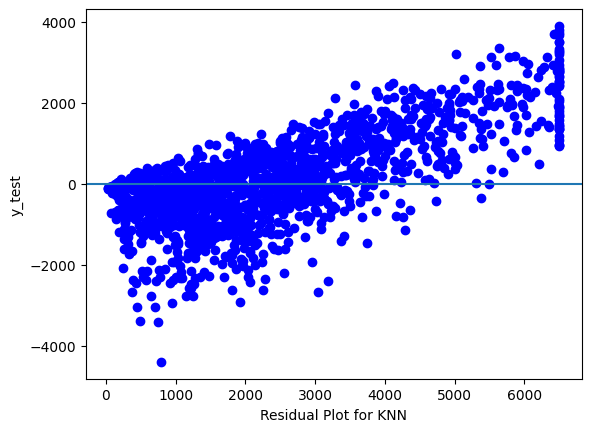

In [168]:
residual_loss(model1,"KNN")

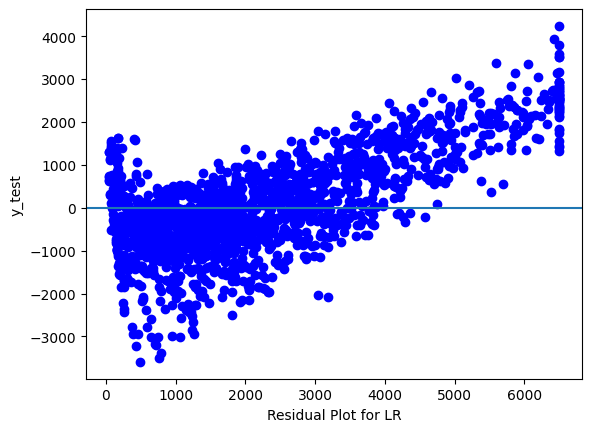

In [169]:
residual_loss(model2,"LR")

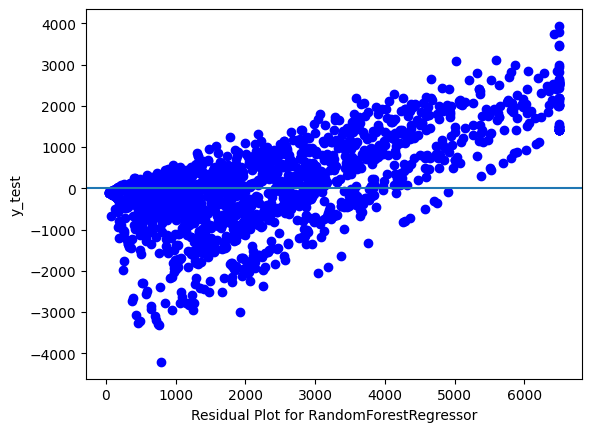

In [170]:
residual_loss(model3,"RandomForestRegressor")

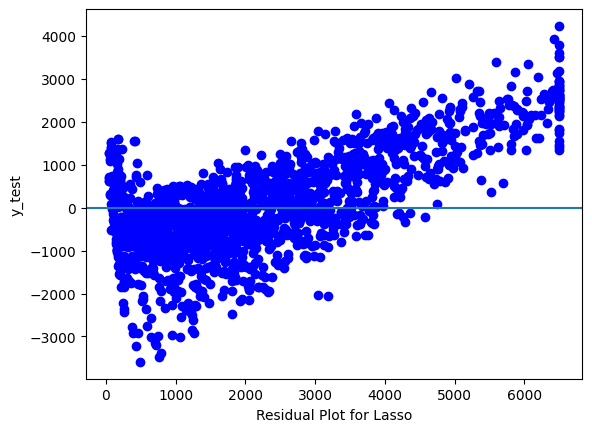

In [171]:
residual_loss(model4,"Lasso")

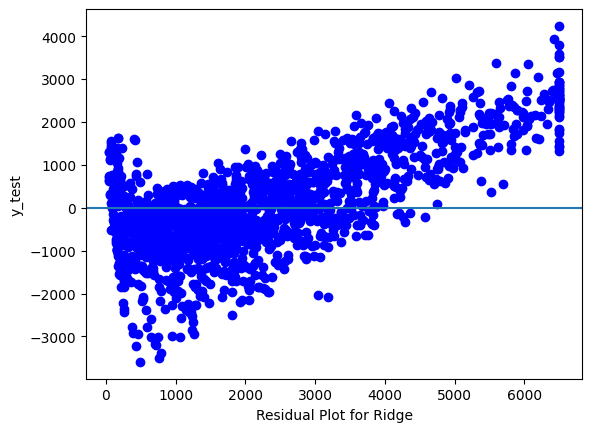

In [172]:
residual_loss(model5,"Ridge")

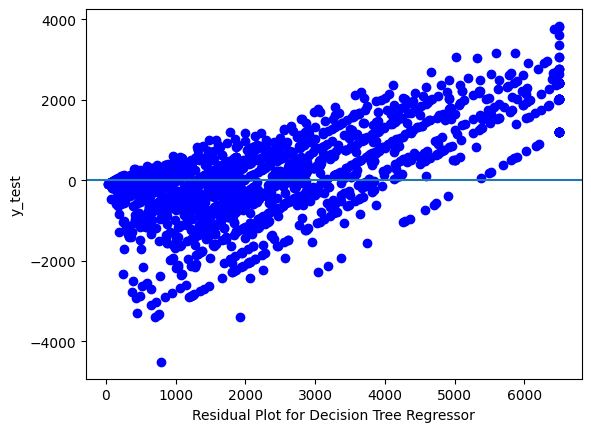

In [173]:
residual_loss(model6,"Decision Tree Regressor")

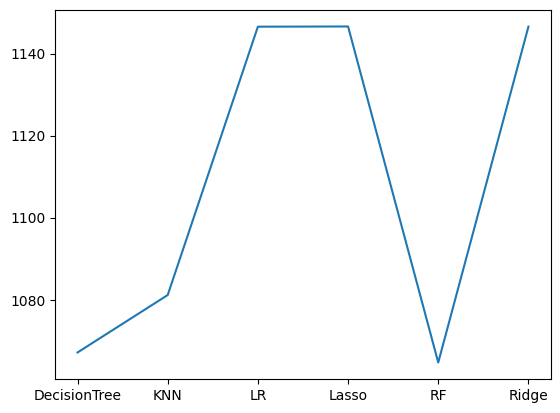

In [174]:
import matplotlib.pylab as plt

lists = sorted(rmse_values.items()) 

x, y = zip(*lists)
plt.plot(x, y)
plt.show()

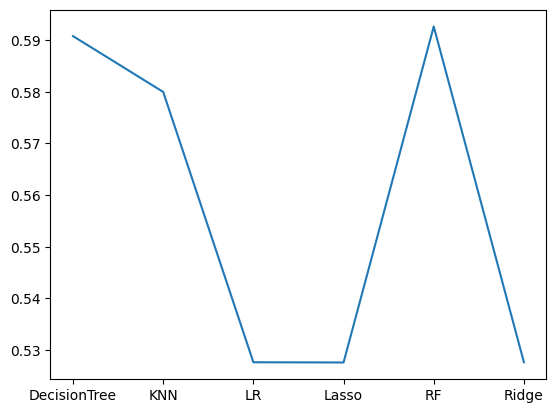

In [175]:

plt.plot(*zip(*sorted(r2_score_values.items())))

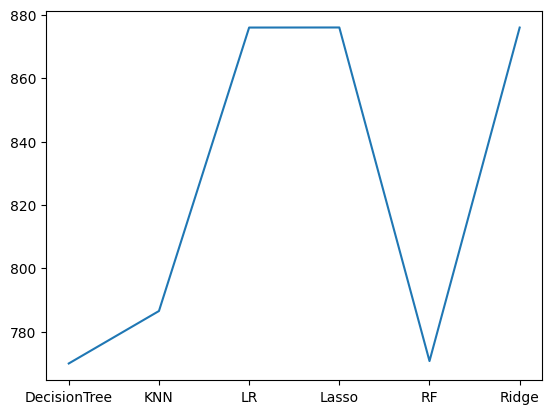

In [176]:

plt.plot(*zip(*sorted(mae_values.items())))

